In [1]:
# import all packages and libraries here.
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import metrics, svm, linear_model , model_selection, preprocessing, pipeline, impute, compose,decomposition

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

/home/rahmani/work/envs/ML/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


In [4]:
pca = decomposition.PCA()
pca.fit(X_train)

PCA()

In [58]:
pca.components_.shape

(784, 784)

In [59]:
pca.explained_variance_ratio_[:350].sum()

0.9919524427549277

In [60]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # d equals 154 ===> Now we can set 154 for n_components in pca
d

154

In [61]:
cumsun_variance = np.cumsum(pca.explained_variance_ratio_)
cumsun_variance[cumsun_variance>0.95].sum()

625.7644542998098

In [101]:
### selcetion principle comp
n_component = 154
proj_matric = pca.components_[:n_component].T # 169=13*13 for ploting and 154 for best case
proj_matric.shape

(784, 154)

In [102]:
X_train.shape

(60000, 784)

In [103]:
### transform matrix 
X_train_transofmed = X_train @ proj_matric
X_train_transofmed.shape

(60000, 154)

In [104]:

X_train_recoverd = X_train_transofmed @ np.linalg.pinv(proj_matric)
x_train_transofmed.shape

(60000, 154)

<Figure size 300x300 with 0 Axes>

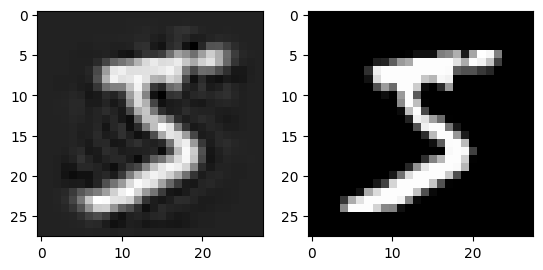

In [107]:
plt.figure(figsize=(3,3))
# plt.subplots((1,2))
fig , (ax0, ax1) = plt.subplots(1,2)
ax0.imshow(X_train_recoverd[0,:].reshape(28,28), cmap='gray')
ax1.imshow(X_train[0,:].reshape(28,28), cmap='gray')

## PCA bultin

In [116]:
pca2 = decomposition.PCA(n_components=0.95)
pca2.fit(X_train)

PCA(n_components=0.95)

In [117]:
pca2.n_components_ ,pca2.n_components 

(154, 0.95)

In [118]:
X_train_transfrom2 = pca2.transform(X_train)

In [119]:
X_train_transfrom2.shape

(60000, 154)

In [120]:
X_train_recoverd2 = pca2.inverse_transform(X_train_transfrom2)

<Figure size 300x300 with 0 Axes>

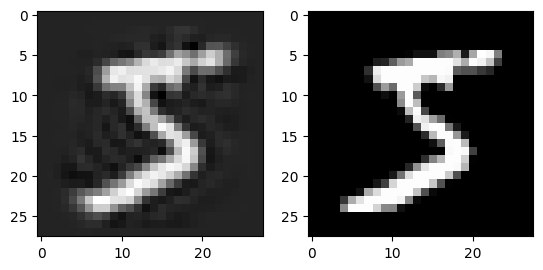

In [121]:
plt.figure(figsize=(3,3))
fig , (ax0, ax1) = plt.subplots(1,2)
ax0.imshow(X_train_recoverd2[0,:].reshape(28,28), cmap='gray')
ax1.imshow(X_train[0,:].reshape(28,28), cmap='gray')

## PCA PreProccesspr

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
clf = make_pipeline(PCA(n_components=154,random_state=42),
RandomForestClassifier(random_state=42))
param_distrib = {
"pca__n_components": np.arange(10, 80),
"randomforestclassifier__n_estimators": np.arange(50, 500)
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3,
random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca',
                                              PCA(n_components=154,
                                                  random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [122]:
y_predict = rnd_search.predict(X_test)

In [124]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       980
           1       0.95      0.97      0.96      1135
           2       0.87      0.86      0.87      1032
           3       0.89      0.80      0.85      1010
           4       0.82      0.79      0.81       982
           5       0.78      0.77      0.77       892
           6       0.87      0.88      0.87       958
           7       0.88      0.89      0.88      1028
           8       0.83      0.79      0.81       974
           9       0.74      0.83      0.78      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

